In [ ]:
#Importando librerias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import h5py


# **Exploratory Data Analysis**

## *Primer vistazo*

In [ ]:
#@title Viendo los archivos de features extraidas disponibles para su respectivo análisis

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive/')

# Define the path to the folder containing the CSV files
path = '/content/drive/MyDrive/UTEC/Ciclo 5/Machine Learning/Proyectos/Proyecto Clasificacion/Extracted Features'

# Verify the folder path
if os.path.exists(path):
    # List all files in the folder
    files = os.listdir(path)
    print("Files in the folder:", files)
else:
    print(f"The folder {path} does not exist.")



Mounted at /content/drive/
Files in the folder: ['top_features_RandomForest.csv', 'efficient_test.csv', 'features_minimal.csv', 'features_complete.csv', 'features_efficient.csv', 'minimal_test.csv', 'match_ef_forest.csv', 'test_match_forest.csv']


In [ ]:
#@title Menu para seleccionar el set de features (minimal, efficient, complete)

import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Path to the folder containing the CSV files
path = '/content/drive/MyDrive/UTEC/Ciclo 5/Machine Learning/Proyectos/Proyecto Clasificacion/Extracted Features'

# Define the available options
options = {
    'minimal': ['features_minimal.csv', 'minimal_test.csv'],
    'efficient': ['features_efficient.csv', 'efficient_test.csv'],
    'complete': ['features_complete.csv'],
    'top_random_forest_features': ['top_features_RandomForest.csv']
}

# Dropdown for selecting the option
option_dropdown = widgets.Dropdown(
    options=['minimal', 'efficient', 'complete', 'top_random_forest_features'],
    value=None,
    description='Select Option:',
    disabled=False,
)

# Button to confirm the selection
confirm_button = widgets.Button(
    description='Confirm Selection',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to confirm your selection',
    icon='check'
)

# Global variables to store the dataframes
global df, test_df
df = None
test_df = None

# Function to load datasets based on the selected option
def load_datasets(option):
    global df, test_df
    if option in ['complete', 'top_random_forest_features']:
        # Load only the selected dataset
        train_filename = options[option][0]
        df = pd.read_csv(os.path.join(path, train_filename))
        test_df = None
        print(f"Loaded dataset: {train_filename}")
    else:
        # Load both train and test datasets
        train_filename, test_filename = options[option]
        df = pd.read_csv(os.path.join(path, train_filename))
        test_df = pd.read_csv(os.path.join(path, test_filename))
        print(f"Loaded train dataset: {train_filename}")
        print(f"Loaded test dataset: {test_filename}")

# Function to handle the button click event
def on_button_click(b):
    clear_output(wait=True)
    option = option_dropdown.value
    if option:
        load_datasets(option)
        display_dataframes()

# Display the dropdown and button
display(option_dropdown, confirm_button)

# Link the button click event to the handler function
confirm_button.on_click(on_button_click)

# Function to print the first few rows of the DataFrames
def display_dataframes():
    global train_df, test_df
    print("Train DataFrame:")
    display(df.head(3))
    if test_df is not None:
        print("Test DataFrame:")
        display(test_df.head(3))

# Initial message
print("Please select an option from the dropdown menu and click the confirm button.")



Loaded train dataset: features_efficient.csv
Loaded test dataset: efficient_test.csv
Train DataFrame:


,Unnamed: 0,body_gyro_x__variance_larger_than_standard_deviation,body_gyro_x__has_duplicate_max,body_gyro_x__has_duplicate_min,body_gyro_x__has_duplicate,body_gyro_x__sum_values,body_gyro_x__abs_energy,body_gyro_x__mean_abs_change,body_gyro_x__mean_change,body_gyro_x__mean_second_derivative_central,...,body_acc_z__fourier_entropy__bins_100,body_acc_z__permutation_entropy__dimension_3__tau_1,body_acc_z__permutation_entropy__dimension_4__tau_1,body_acc_z__permutation_entropy__dimension_5__tau_1,body_acc_z__permutation_entropy__dimension_6__tau_1,body_acc_z__permutation_entropy__dimension_7__tau_1,body_acc_z__query_similarity_count__query_None__threshold_0.0,body_acc_z__mean_n_absolute_max__number_of_maxima_7,id,label
0,0,0.0,0.0,0.0,0.0,2.848045,0.090038,0.003021,-0.000011,-0.000088,...,0.373665,1.648666,2.712257,3.634010,4.201293,4.494211,NaN,0.048618,0,5.0
1,1,0.0,0.0,0.0,0.0,1.526497,0.052355,0.003626,-0.000439,-0.000031,...,1.558024,1.640304,2.682875,3.663247,4.351357,4.663375,NaN,0.025859,1,5.0
2,2,0.0,0.0,0.0,0.0,-0.531141,0.065609,0.004110,-0.000366,0.000025,...,1.599305,1.605346,2.599922,3.536648,4.283879,4.632071,NaN,0.013519,2,5.0


Test DataFrame:


,Unnamed: 0,body_gyro_y__variance_larger_than_standard_deviation,body_gyro_y__has_duplicate_max,body_gyro_y__has_duplicate_min,body_gyro_y__has_duplicate,body_gyro_y__sum_values,body_gyro_y__abs_energy,body_gyro_y__mean_abs_change,body_gyro_y__mean_change,body_gyro_y__mean_second_derivative_central,...,body_gyro_x__fourier_entropy__bins_5,body_gyro_x__fourier_entropy__bins_10,body_gyro_x__fourier_entropy__bins_100,body_gyro_x__permutation_entropy__dimension_3__tau_1,body_gyro_x__permutation_entropy__dimension_4__tau_1,body_gyro_x__permutation_entropy__dimension_5__tau_1,body_gyro_x__permutation_entropy__dimension_6__tau_1,body_gyro_x__permutation_entropy__dimension_7__tau_1,body_gyro_x__query_similarity_count__query_None__threshold_0.0,body_gyro_x__mean_n_absolute_max__number_of_maxima_7
0,0,0.0,0.0,0.0,0.0,-1.008626,2.595572,0.034519,-0.004740,-0.000744,...,0.216408,0.552680,1.765763,1.637961,2.715703,3.626896,4.217770,4.570162,NaN,0.424950
1,1,0.0,0.0,0.0,0.0,-6.527620,0.729799,0.013106,0.000329,0.000201,...,0.158734,0.237736,0.698256,1.511274,2.423728,3.251943,3.948633,4.299156,NaN,0.158937
2,2,0.0,0.0,0.0,0.0,-5.313343,0.263845,0.005998,0.000235,-0.000019,...,0.295163,0.373665,1.290046,1.475391,2.362032,3.223285,3.954031,4.409246,NaN,0.061671


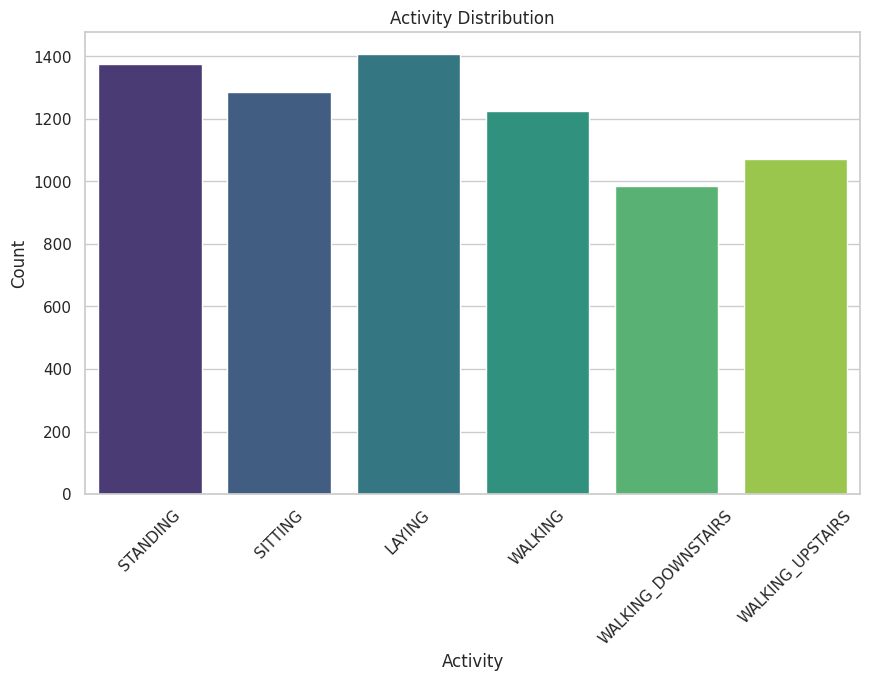

In [ ]:
#@title Distribucion de actividades

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

shape = df.shape

# Display summary statistics
summary_statistics = df.describe()

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Map numerical labels to activity names
label_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}
df['activity'] = df['label'].map(label_mapping)
sns.set(style="whitegrid")

x='activity'
# Plot the distribution of activities
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity', palette='viridis', hue=x, legend = False)
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

non_numeric_counts = df.apply(lambda col: pd.to_numeric(col, errors='coerce').isna().sum())

non_numeric_cols_with_nan = non_numeric_counts[non_numeric_counts > 0]
print(non_numeric_cols_with_nan)

df = df.drop(columns=non_numeric_cols_with_nan.index)
df



body_gyro_x__fft_coefficient__attr_"real"__coeff_65              7352
body_gyro_x__fft_coefficient__attr_"real"__coeff_66              7352
body_gyro_x__fft_coefficient__attr_"real"__coeff_67              7352
body_gyro_x__fft_coefficient__attr_"real"__coeff_68              7352
body_gyro_x__fft_coefficient__attr_"real"__coeff_69              7352
                                                                 ... 
body_acc_z__fft_coefficient__attr_"angle"__coeff_97              7352
body_acc_z__fft_coefficient__attr_"angle"__coeff_98              7352
body_acc_z__fft_coefficient__attr_"angle"__coeff_99              7352
body_acc_z__query_similarity_count__query_None__threshold_0.0    7352
activity                                                         7352
Length: 1270, dtype: int64


,Unnamed: 0,body_gyro_x__variance_larger_than_standard_deviation,body_gyro_x__has_duplicate_max,body_gyro_x__has_duplicate_min,body_gyro_x__has_duplicate,body_gyro_x__sum_values,body_gyro_x__abs_energy,body_gyro_x__mean_abs_change,body_gyro_x__mean_change,body_gyro_x__mean_second_derivative_central,...,body_acc_z__fourier_entropy__bins_10,body_acc_z__fourier_entropy__bins_100,body_acc_z__permutation_entropy__dimension_3__tau_1,body_acc_z__permutation_entropy__dimension_4__tau_1,body_acc_z__permutation_entropy__dimension_5__tau_1,body_acc_z__permutation_entropy__dimension_6__tau_1,body_acc_z__permutation_entropy__dimension_7__tau_1,body_acc_z__mean_n_absolute_max__number_of_maxima_7,id,label
0,0,0.0,0.0,0.0,0.0,2.848045,0.090038,0.003021,-0.000011,-0.000088,...,0.237736,0.373665,1.648666,2.712257,3.634010,4.201293,4.494211,0.048618,0,5.0
1,1,0.0,0.0,0.0,0.0,1.526497,0.052355,0.003626,-0.000439,-0.000031,...,0.463549,1.558024,1.640304,2.682875,3.663247,4.351357,4.663375,0.025859,1,5.0
2,2,0.0,0.0,0.0,0.0,-0.531141,0.065609,0.004110,-0.000366,0.000025,...,0.344287,1.599305,1.605346,2.599922,3.536648,4.283879,4.632071,0.013519,2,5.0
3,3,0.0,0.0,0.0,0.0,-2.077232,0.044462,0.003272,0.000239,0.000022,...,0.793007,2.100919,1.627522,2.696565,3.626822,4.313764,4.663375,0.013817,3,5.0
4,4,0.0,0.0,0.0,0.0,-0.829770,0.032455,0.002810,0.000276,0.000010,...,1.014171,2.477488,1.702692,2.827284,3.851348,4.505822,4.747206,0.012910,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,7347,0.0,0.0,0.0,0.0,-0.970131,35.212726,0.118804,0.005300,-0.000681,...,0.316490,0.880303,1.414036,2.211961,2.970013,3.592496,4.074952,0.428957,7347,2.0
7348,7348,0.0,0.0,0.0,0.0,19.322758,29.308783,0.099937,-0.001604,-0.000488,...,0.295163,0.873090,1.465205,2.296770,3.024476,3.622576,4.084824,0.431432,7348,2.0
7349,7349,0.0,0.0,0.0,0.0,-24.490664,42.148554,0.085600,-0.005873,0.000123,...,0.295163,0.740912,1.484313,2.338453,3.063793,3.692749,4.134281,0.473491,7349,2.0
7350,7350,0.0,0.0,0.0,0.0,-49.970731,41.028934,0.089873,-0.000268,0.000229,...,0.295163,0.732862,1.501848,2.373618,3.157492,3.748962,4.120090,0.465548,7350,2.0


Debido a que nuestra data es muy grande por la cantidad de columnas, los calculos para realizar ciertos graficas, calculos estadísticos, entre otros estan tomando bastante tiempo. Por lo tanto priorizaremos en reducir la cantidad de features de nuestro dataframe original.

Finalmente compararemos el dataframe reducido con el dataframe original (efficient features) para ver como es que esta data al ser reducida dimensionalmente puede cambiar su forma, ya sea luego de aplicarle PCA, T SNE y LDA.

# Feature Selection

### Test Estadísticos




`Mutual Information (MI):`

Cuantifica cuánta información proporciona una variable sobre otra.

En el contexto de la selección de características, la IM ayuda a identificar qué características son informativas para predecir la variable objetivo.

El IM puede captar cualquier tipo de dependencia entre variables, no sólo las relaciones lineales.

Los valores de IM más altos indican dependencias más fuertes entre las características y el objetivo.

`F-score`: Se calcula a partir de la prueba ANOVA F-test, que se utiliza para comprobar si existen diferencias estadísticamente significativas entre las medias de dos o más grupos. El F-score representa la relación entre la varianza entre los grupos y la varianza dentro de los grupos. Un F-score más alto indica un mayor grado de separación entre las medias de los grupos.


`P-value`: Es la probabilidad de que se produzcan los datos observados (o algo más extremo) si la hipótesis nula fuera cierta. En el contexto de F-test, la hipótesis nula suele afirmar que no hay diferencias entre las medias de los grupos. Un valor p bajo (normalmente inferior a 0,05) indica que se puede rechazar la hipótesis nula y que las diferencias entre las medias de los grupos son estadísticamente significativas.

`Es decir, ambos P-value y F-Score nos indicaran lo mismo, por eso usamos la otra medicionq que seria el mutual information`

In [ ]:
#@title Anova Test, P value y Mutual Information
from sklearn.feature_selection import f_classif, mutual_info_classif

X = df.drop(columns=['label', 'id','Unnamed: 0', 'activity'])
y = df['label']

# Calculating ANOVA F-test scores
f_scores, p_values = f_classif(X, y)

# Calculating Mutual Information scores
mi_scores = mutual_info_classif(X, y)

# Creating a DataFrame to hold feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-score': f_scores,
    'P-value': p_values,
    'Mutual Information': mi_scores
})



Displaying the top features based on F-score and Mutual Information
Most

In [ ]:
top_fscore_features = feature_scores.sort_values(by='F-score', ascending=False).head(10)
top_fscore_features

,Feature,F-score,P-value,Mutual Information
1925,total_acc_x__root_mean_square,41075.766604,0.0,0.848297
2543,total_acc_x__mean_n_absolute_max__number_of_ma...,40074.801061,0.0,1.271148
2302,"total_acc_x__fft_coefficient__attr_""abs""__coeff_0",39700.666151,0.0,0.676603
1941,total_acc_x__absolute_maximum,36568.610569,0.0,1.322432
1998,total_acc_x__quantile__q_0.9,33812.973868,0.0,1.273548
1940,total_acc_x__maximum,33769.564946,0.0,1.322542
1997,total_acc_x__quantile__q_0.8,29646.250484,0.0,1.200355
2472,"total_acc_x__agg_linear_trend__attr_""intercept...",29499.692586,0.0,1.222447
1918,total_acc_x__mean,29143.279647,0.0,0.676603
2172,"total_acc_x__fft_coefficient__attr_""real""__coe...",29143.279647,0.0,0.676603


In [ ]:
top_mi_features = feature_scores.sort_values(by='Mutual Information', ascending=False).head(10)
top_mi_features

,Feature,F-score,P-value,Mutual Information
1940,total_acc_x__maximum,33769.564946,0.0,1.322542
1941,total_acc_x__absolute_maximum,36568.610569,0.0,1.322432
1998,total_acc_x__quantile__q_0.9,33812.973868,0.0,1.273548
2543,total_acc_x__mean_n_absolute_max__number_of_ma...,40074.801061,0.0,1.271148
2472,"total_acc_x__agg_linear_trend__attr_""intercept...",29499.692586,0.0,1.222447
1997,total_acc_x__quantile__q_0.8,29646.250484,0.0,1.200355
2578,total_acc_y__minimum,8241.380244,0.0,1.131483
1942,total_acc_x__minimum,12843.700261,0.0,1.127517
1992,total_acc_x__quantile__q_0.2,19063.506973,0.0,1.103721
1991,total_acc_x__quantile__q_0.1,17135.219543,0.0,1.097592


NO USAMOS RECURSIVE FEATURE ELIMINATION YA QUE LA CANTIDAD DE COLUMNAS A EVALUAR EN NUESTRO DATASET ORIGINAL SON TANTAS QUE LA ELIMINACION DE LAS FEATURES TARDARIA BASTANTE. Esto incluye RECURSIVE FEATURE ELIMINATION y Forward Sequential Feature Selection


### Wrapper Methods (No se utiliza porque toma demasiado tiempo debido a la cantidad de columnas del dataset)


In [ ]:
#@title Recursive Feature Elimination with logistic regression (no usar)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Setting up the logistic regression model
logistic_model = LogisticRegression(max_iter=500)

# Creating the RFE model. We will select the top 20 features for simplicity.
rfe = RFE(estimator=logistic_model, n_features_to_select=20)

# Fit RFE
rfe.fit(X, y)

# Summarizing the selection of the features
selected_features_rfe = X.columns[rfe.support_]
selected_features_rfe, rfe.ranking_


In [ ]:
#@title Recursive Feature Elimination with Random Forest (no usar)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Preparing the data
X = data.drop(columns=['label'])
y = data['label']

# Create the RFE object and compute a cross-validated score.
rfc = RandomForestClassifier()  # Random Forest classifier
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Show the number of features selected and their names
selected_features = X.columns[rfecv.support_]
selected_features, rfecv.n_features_


Por otro lado, the Forward Sequential Feature Selection (Forward SFS), we will use the `F1 score or AUC-ROC` as the performance metric to guide the selection process. We'll add features `in the order of relevance based on their ANOVA F-scores`, beginning with the most significant features.

In [ ]:
#@title Forward Sequential Feature Selection with logistic regression (NO USAR)

from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[sorted_features[:10]])  # Using only the top 10 features based on ANOVA F-score
X_scaled_df = pd.DataFrame(X_scaled, columns=sorted_features[:10])

# Setting up Forward SFS with Logistic Regression on the scaled top 10 features
sfs_scaled = SequentialFeatureSelector(
    logistic_model,
    n_features_to_select=None,  # None means that selection stops when performance decreases
    direction='forward',
    scoring=make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr'),
    cv=5
)

# Fit SFS on the scaled data
sfs_scaled.fit(X_scaled_df, y)

# List of selected features after adjustment
selected_features_sfs_scaled = X_scaled_df.columns[sfs_scaled.get_support()]
selected_features_sfs_scaled, len(selected_features_sfs_scaled)


### **Finalmente utilizamos el valor de features importance de un random forest para escoger nuestras mejores variables y reducir nuestro dataset. Aquí no hay que reentrenar un modelo agregando o disminuyendo uno por uno las features como lo hubieran hecho los wrappers, que hubieran demorado una eternidad.**

In [ ]:
#@title Extrayendo las features más relevantes en base a su importance con un random forest classifier (USADO ACTUALMENTE)


from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df.drop(columns=['label', 'id','Unnamed: 0'])
y = df['label']

# Train a RandomForestClassifier to identify important features
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and select top features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(650)

# Create a DataFrame with the top features
top_features_df = df[top_features['Feature'].tolist() + ['label', 'id']]
top_features_df


In [ ]:
# Save the top features DataFrame to a CSV file
top_features_df.to_csv('top_features_RandomForest.csv', index=False)

In [ ]:
#@title Ahora, tenemos que hacer match en las columnas de nuestro dataframe reducido con el dataframe de test (USADO ACTUALMENTE)
# Leer los archivos CSV
efficient_test_df = test_df # Debe haber seleccionado efficient al momento de cargar el dataset
top_features_rf_df = top_features_df
# Excluir la columna 'id' de top_features_rf_df
excluded_columns = ['id']
columns_rf_filtered = [col for col in top_features_rf_df.columns if col not in excluded_columns]

# Encontrar las columnas comunes excluyendo 'label'
common_columns = [col for col in columns_rf_filtered if col in efficient_test_df.columns]

# Crear un nuevo dataframe con las columnas comunes más 'label'
match_ef_forest = top_features_rf_df[common_columns + ['label']]

# Crear otro dataframe test_match_forest con las mismas columnas que match_ef_forest, excluyendo 'label'
test_match_forest_columns = [col for col in common_columns if col in efficient_test_df.columns]
test_match_forest = efficient_test_df[test_match_forest_columns]

match_ef_forest.to_csv('match_ef_forest.csv', index=False)
test_match_forest.to_csv('test_match_forest.csv', index=False)

# Retornar el número de columnas comunes
num_common_columns = len(common_columns)

### **Ahora veremos que tan similares fueron el test estadistico y el feature importance para escoger las features**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Path to the folder containing the CSV files
path = '/content/drive/MyDrive/UTEC/Ciclo 5/Machine Learning/Proyectos/Proyecto Clasificacion/Extracted Features/match_ef_forest.csv'

df = pd.read_csv(path)
df.head(3)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,total_acc_x__c3__lag_1,"body_acc_x__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","total_acc_x__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6",total_acc_x__c3__lag_3,"total_acc_x__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)","total_acc_x__cwt_coefficients__coeff_11__w_20__widths_(2, 5, 10, 20)",total_acc_x__mean_n_absolute_max__number_of_maxima_7,"total_acc_x__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""mean""","total_acc_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2",total_acc_x__quantile__q_0.8,...,total_acc_y__binned_entropy__max_bins_10,body_gyro_z__variance,"body_gyro_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",total_acc_x__number_peaks__n_1,total_acc_y__longest_strike_above_mean,"body_gyro_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.0",body_acc_x__fourier_entropy__bins_5,"body_gyro_x__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","body_gyro_x__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2",label
0,1.059088,0.000045,0.001088,1.059019,2.244303,1.947003,1.022925,0.000028,9.339141e-07,1.020574,...,2.119114,0.000035,0.002761,34.0,9.0,0.000004,0.079487,0.022398,0.000007,5.0
1,1.059527,0.000045,0.001119,1.059577,2.240700,1.943727,1.023272,0.000036,9.280706e-07,1.020773,...,2.067352,0.000055,0.002545,30.0,17.0,0.000009,0.891060,0.022625,0.000009,5.0
2,1.060862,0.000062,0.001578,1.060927,2.240934,1.943291,1.025791,0.000050,1.854071e-06,1.022051,...,2.107271,0.000077,0.003002,29.0,19.0,0.000006,0.948691,0.043031,0.000010,5.0


In [ ]:
original_cols = df.columns

# Check how many columns of the random forest feature selection are in the top 10 F-score features
top_fscore_cols = top_fscore_features['Feature'].isin(original_cols).sum()

# Check how many columns are in the top 10 Mutual Information features
top_mi_cols = top_mi_features['Feature'].isin(original_cols).sum()

top_fscore_feature_names = top_fscore_features['Feature'][top_fscore_features['Feature'].isin(original_cols)].tolist()
top_mi_feature_names = top_mi_features['Feature'][top_mi_features['Feature'].isin(original_cols)].tolist()

print(f"Number of original DataFrame columns in the top 10 F-score features: {top_fscore_cols}")
print(f"Names of original DataFrame columns in the top 10 F-score features: {top_fscore_feature_names}")

print(f"Number of original DataFrame columns in the top 10 Mutual Information features: {top_mi_cols}")
print(f"Names of original DataFrame columns in the top 10 Mutual Information features: {top_mi_feature_names}")


In [ ]:
# Filter features with P-value less than 0.05
significant_features = feature_scores[feature_scores['P-value'] < 0.05]

# Count how many of df1's features are in the significant features
significant_in_df1 = significant_features[significant_features['Feature'].isin(original_cols)]

# Count and display the number of significant features in df1
num_significant_features_in_df1 = significant_in_df1.shape[0]
print(f"Number of features in df1 with P-value less than 0.05: {num_significant_features_in_df1}")



Number of features in df1 with P-value less than 0.05: 628


### **se aprecia que el feature importance del random forest fue bastante preciso al escoger las columnas ya que todas las columnas menos 2 tienen un p value significativo, hicimos un buen trabajo

### Reescribir

# HACER GRAFICOS COMPARANDO RANDOM FOREST DATASET y EFFICIENT

In [ ]:
from sklearn.manifold import TSNE
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the datasets
file_path = '/content/drive/MyDrive/UTEC/Ciclo 5/Machine Learning/Proyectos/Proyecto Clasificacion/Extracted Features/match_ef_forest.csv' # Feature Importance Dataset
file_path2 = '/content/drive/MyDrive/UTEC/Ciclo 5/Machine Learning/Proyectos/Proyecto Clasificacion/Extracted Features/features_efficient.csv' # Original Dataset

df = pd.read_csv(file_path) # Feature Importance Dataset
df2 = pd.read_csv(file_path2) # Original Dataset
df2=df2.dropna(axis=1)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Map numerical labels to activity names
label_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}
df['activity'] = df['label'].map(label_mapping)
df2['activity'] = df2['label'].map(label_mapping)

<ipython-input-29-58e2845cb8d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['activity'] = df2['label'].map(label_mapping)


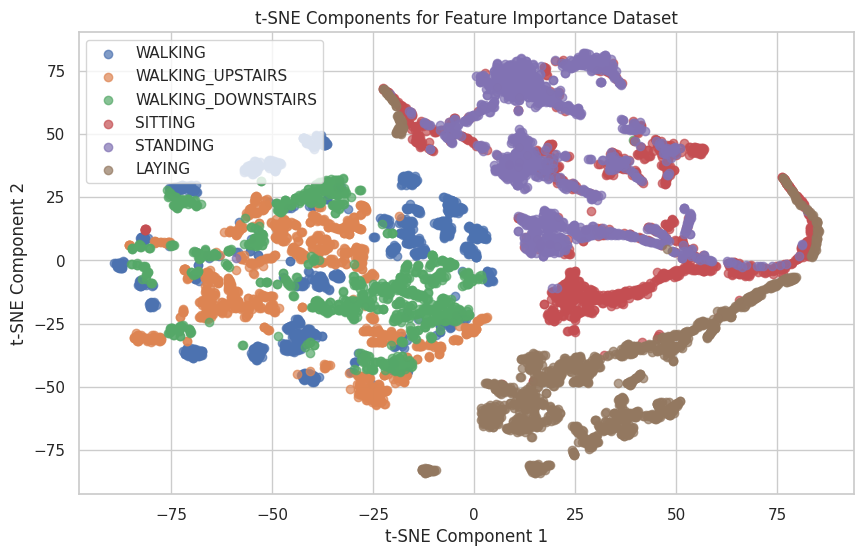

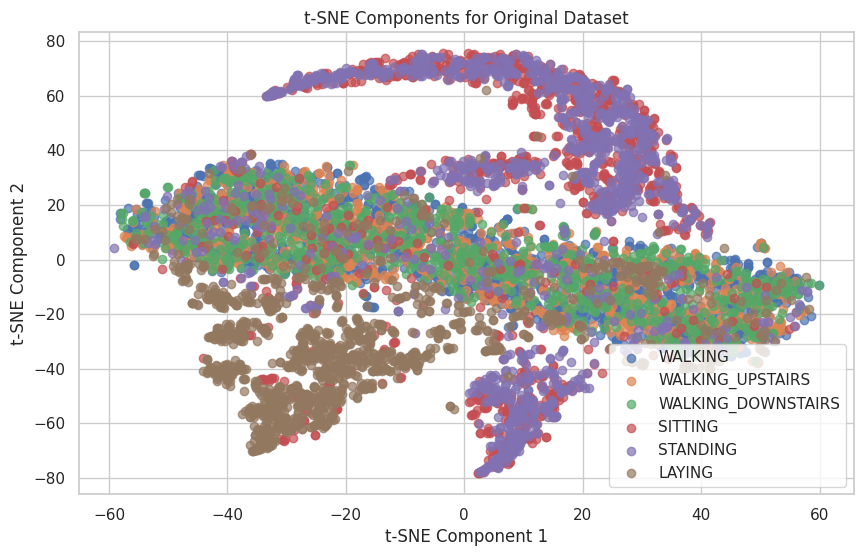

In [ ]:
#@title  Function to plot t-SNE results
 Function to plot t-SNE results
def plot_tsne(X, y, title):
    tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(10, 6))
    for label in np.unique(y):
        label_name = label_mapping[label]
        plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label_name, alpha=0.7)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Separate features and target variable for both datasets
X1 = df.drop(['label', 'activity'], axis=1)
y1 = df['label']

X2 = df2.drop(['label', 'id', 'activity'], axis=1)
y2 = df2['label']

# Plot t-SNE results for both datasets
plot_tsne(X1, y1, 't-SNE Components for Feature Importance Dataset')
plot_tsne(X2, y2, 't-SNE Components for Original Dataset')



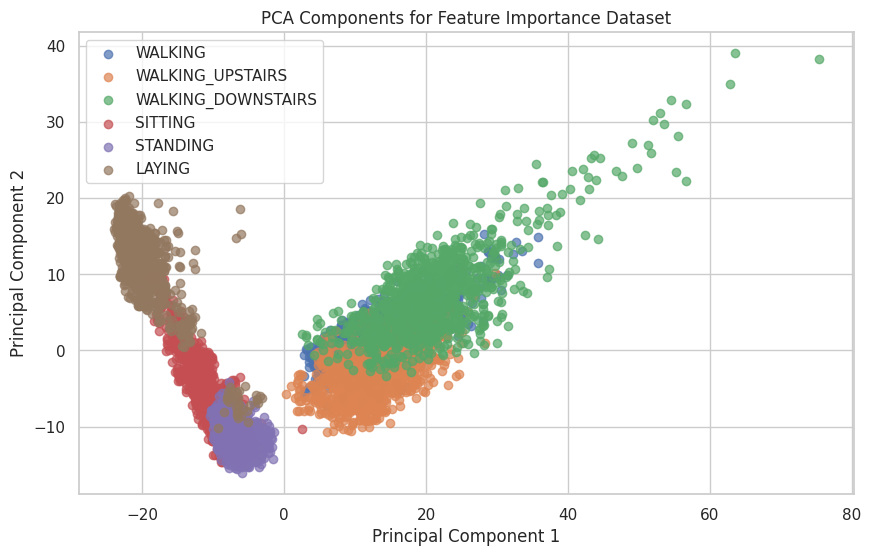

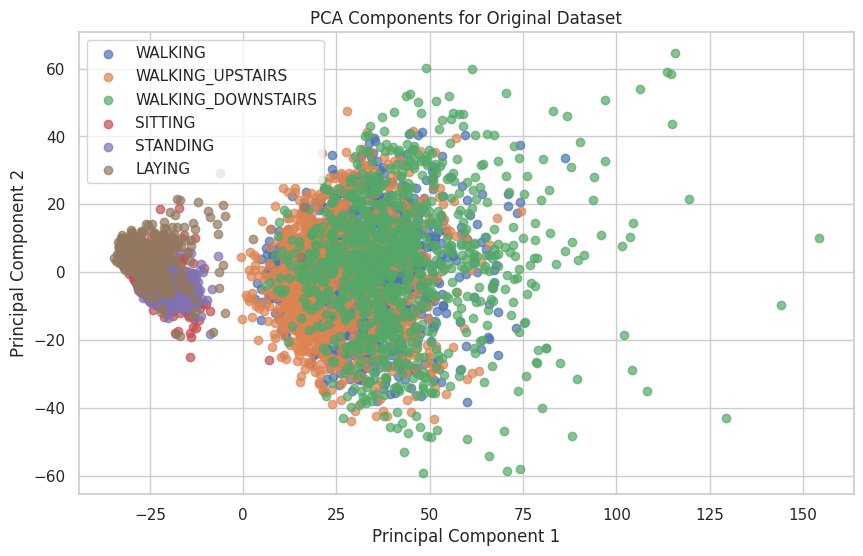

In [ ]:
#@title  Function to plot PCA results
from sklearn.decomposition import PCA

def plot_pca(df, title):
    # Separate features and target variable
    X = df.drop(columns=['label', 'id', 'activity'], errors='ignore').values
    y = df['label'].astype(int).values

    # Normalize the feature values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reduce dimensionality using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a scatter plot of the PCA components
    plt.figure(figsize=(10, 6))
    for label in np.unique(y):
        label_name = label_mapping[label]
        plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label_name, alpha=0.7)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot PCA results for both datasets
plot_pca(df, 'PCA Components for Feature Importance Dataset')
plot_pca(df2, 'PCA Components for Original Dataset')

`PCA` is sensitive to the scale and variance of the input data. `When you reduce the number of features to the most important ones, the variance captured by the first few principal components will change`, leading to different PCA plots.

`The original dataset may contain a lot of redundant or less informative features` that do not contribute much to class separation. By selecting only the most important features, you might have filtered out noise, resulting in a clearer separation of classes in the PCA plot.



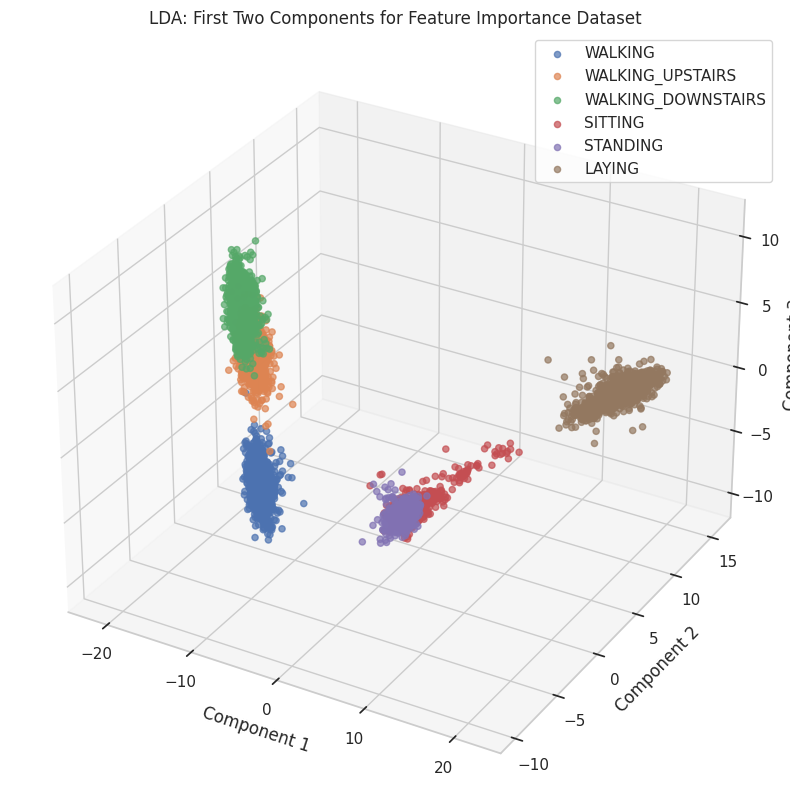

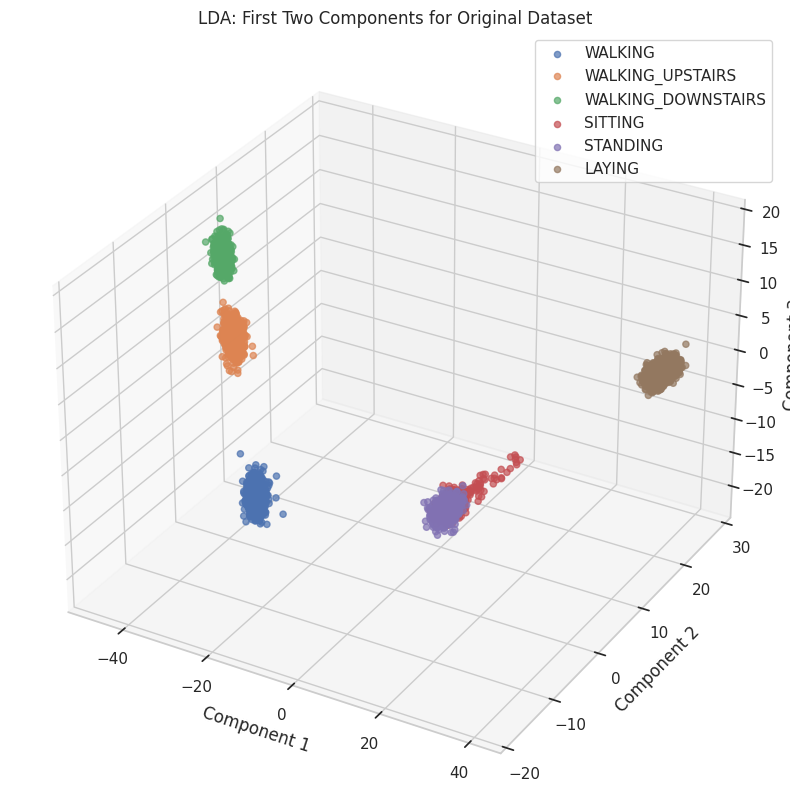

In [ ]:
#@title  Function to plot LDA results

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D

def plot_lda_3d(df, title):
    # Separate features and target variable
    X = df.drop(columns=['label', 'id', 'activity'], errors='ignore').values
    y = df['label'].astype(int).values

    # Normalize the feature values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Perform LDA
    lda = LDA(n_components=5)
    X_lda = lda.fit_transform(X, y)

    # Create a DataFrame with LDA components and labels
    lda_df = pd.DataFrame(X_lda, columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5' ])
    lda_df['label'] = y

    # Create a 3D scatter plot of the LDA components
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    for label in np.unique(y):
        label_name = label_mapping[label]
        ax.scatter(lda_df[lda_df['label'] == label]['Component 1'],
                   lda_df[lda_df['label'] == label]['Component 2'],
                   lda_df[lda_df['label'] == label]['Component 3'],
                   label=label_name, alpha=0.7)

    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()
    plt.show()


# Plot LDA results for both datasets
plot_lda_3d(df, 'LDA: First 3 Components for Feature Importance Dataset')
plot_lda_3d(df2, 'LDA: First 3 Components for Original Dataset')

We can notice that both `class 4 and 5 (purple-red) will be harder to classify`. We will notice this by checking the confusion matrix after the training of the SVM and Random Forest.

# Ver despues

# Extra graficos eda

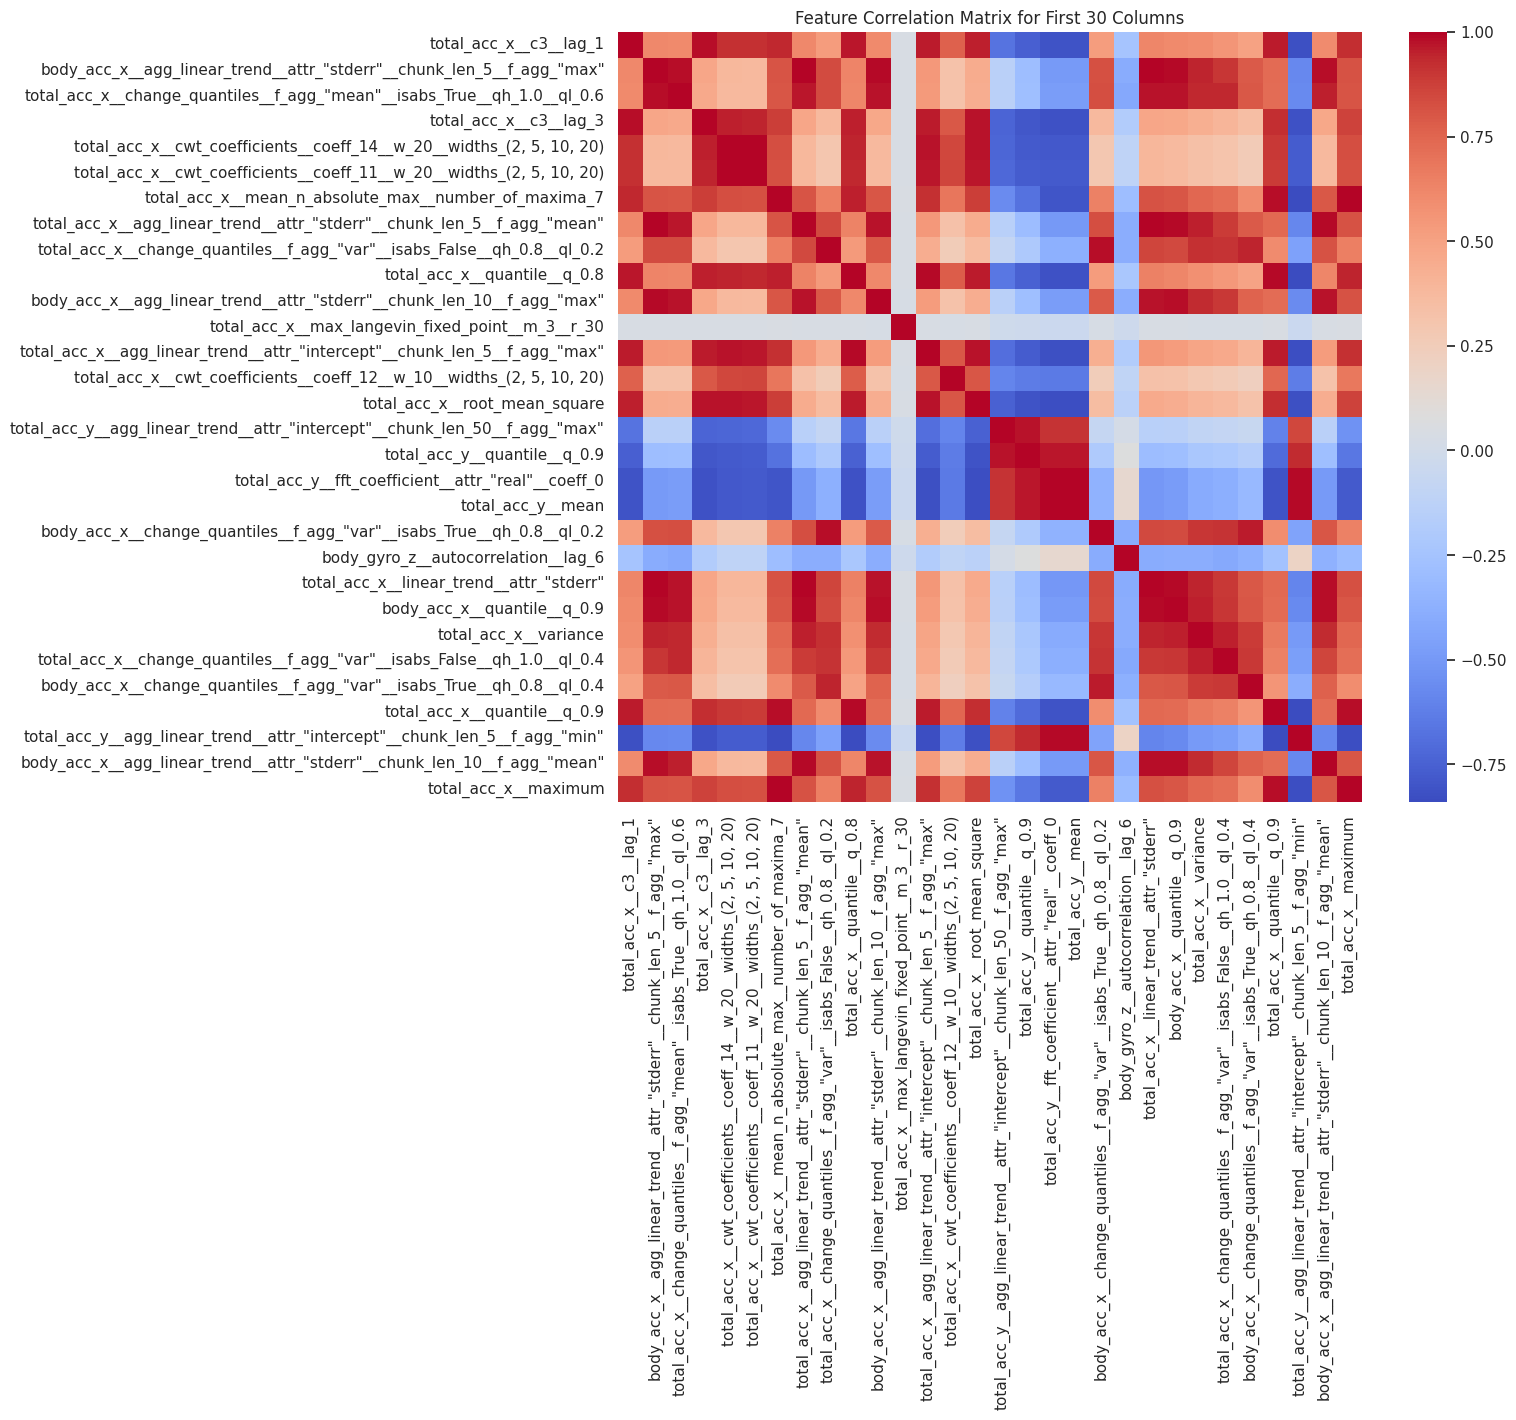

In [ ]:
# Import seaborn for the heatmap
import seaborn as sns

# Compute the correlation matrix for the first 30 columns (this are the top 30 features with the most feature importance)
cols_to_include = df.drop(columns=['activity']).columns[:30]
corr_matrix = df[cols_to_include].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix for First 30 Columns')
plt.show()



In [ ]:
num_unique_values = df['total_acc_x__max_langevin_fixed_point__m_3__r_30'].nunique()

print(f"Number of unique values in the column: {num_unique_values}")


Number of unique values in the column: 7352


In [ ]:
import numpy as np


a = df.drop(columns=['label', 'activity']).columns[:30]
# Find columns with near-constant values
near_constant_columns = [col for col in a if np.std(df[col]) < 1e-3]
print("Columns with near-constant values:", near_constant_columns)


Columns with near-constant values: ['total_acc_x__linear_trend__attr_"stderr"']


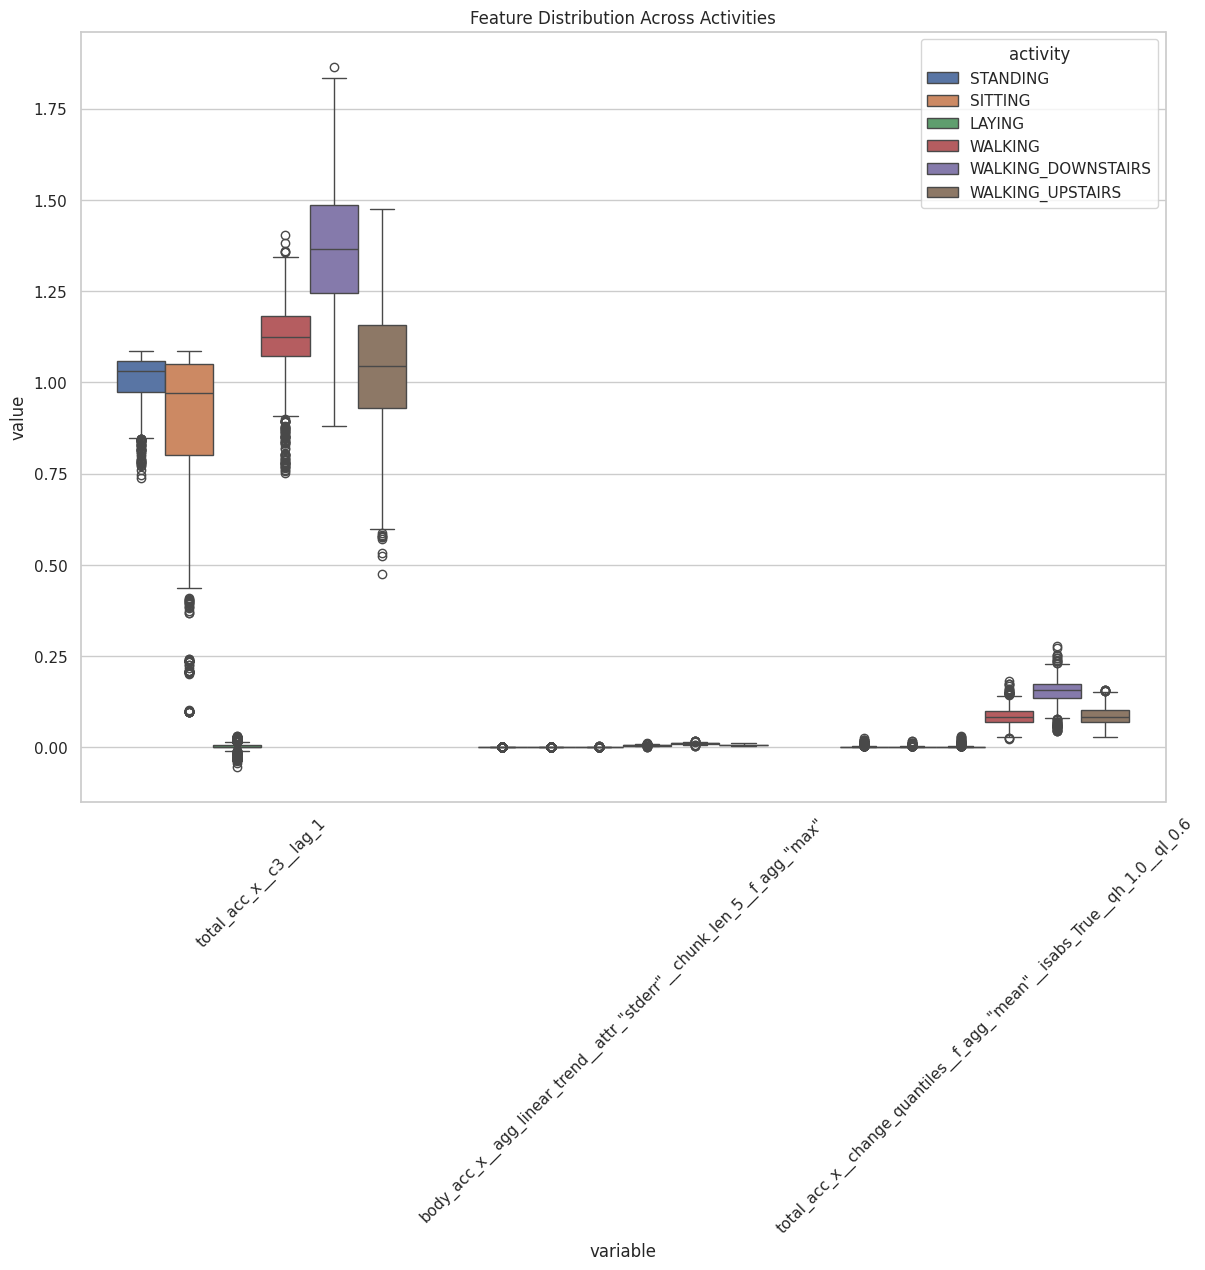

In [ ]:
# Select a few features for comparison
selected_features = df.columns[:2]  # Adjust this based on your preference

# Melt the DataFrame for easier plotting
melted_df = df.melt(id_vars=['activity'], value_vars=selected_features)

# Plot the feature distribution for each activity
plt.figure(figsize=(14, 10))
sns.boxplot(x='variable', y='value', hue='activity', data=melted_df)
plt.title('Feature Distribution Across Activities')
plt.xticks(rotation=45)
plt.show()



In [ ]:
from ipywidgets import interact, widgets
import ipywidgets as widgets

# this esto tiene que ser usado con el dataset de match_ef_forest.csv

'''
1. Se filtra las columnas en función de las dos primeras apariciones de 'total_acc_x', 'total_acc_y', etc.
2. Se crea los widgets para seleccionar el acelerómetro o Giroscopio junto con su axis (X, Y, Z) y trazar los boxplots correspondientes.
'''

# Function to get the first two appearances (top 2 by feature importance) of columns matching a given pattern
def get_first_two_appearances(df, pattern):
    return [col for col in df.columns if pattern in col][:3]

def plot_boxplots(df, sensor_type, axis):
    pattern = f'{sensor_type}_{axis}'
    selected_features = get_first_two_appearances(df, pattern)

    if not selected_features:
        print(f"No features found for pattern: {pattern}")
        return

    melted_df = df.melt(id_vars=['activity'], value_vars=selected_features)

    plt.figure(figsize=(14, 10))
    sns.boxplot(x='variable', y='value', hue='activity', data=melted_df)
    plt.title(f'Feature Distribution for {sensor_type.upper()} {axis.upper()}')
    plt.xticks(rotation=45)
    plt.show()

# Widget creation
sensor_types = ['total_acc', 'body_acc', 'body_gyro']
axes = ['x', 'y', 'z']

sensor_type_widget = widgets.Dropdown(options=sensor_types, description='Sensor Type:')
axis_widget = widgets.Dropdown(options=axes, description='Axis:')

# Interact function
interact(lambda sensor_type, axis: plot_boxplots(df, sensor_type, axis),
         sensor_type=sensor_type_widget,
         axis=axis_widget)


interactive(children=(Dropdown(description='Sensor Type:', options=('total_acc', 'body_acc', 'body_gyro'), val…

<function __main__.<lambda>(sensor_type, axis)>

In [ ]:
# Function to create the line histograms

def plot_line_histograms(df, sensor_type, axis):
    pattern = f'{sensor_type}_{axis}'
    selected_features = get_first_two_appearances(df, pattern)

    if not selected_features:
        print(f"No features found for pattern: {pattern}")
        return

    for feature in selected_features:
        plt.figure(figsize=(14, 10))
        for activity in df['activity'].unique():
            subset = df[df['activity'] == activity]
            sns.histplot(subset[feature], element="step", stat="density", common_norm=False, label=activity)

        plt.title(f'Feature Distribution for {feature}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend(title='Activity')
        plt.show()

# Widget creation
sensor_types = ['total_acc', 'body_acc', 'body_gyro']
axes = ['x', 'y', 'z']

sensor_type_widget = widgets.Dropdown(options=sensor_types, description='Sensor Type:')
axis_widget = widgets.Dropdown(options=axes, description='Axis:')

# Interact function
interact(lambda sensor_type, axis: plot_line_histograms(df, sensor_type, axis),
         sensor_type=sensor_type_widget,
         axis=axis_widget)

interactive(children=(Dropdown(description='Sensor Type:', options=('total_acc', 'body_acc', 'body_gyro'), val…

<function __main__.<lambda>(sensor_type, axis)>

In [ ]:
# Function to create the KDE plots
def plot_kdeplots(df, sensor_type, axis):
    pattern = f'{sensor_type}_{axis}'
    selected_features = get_first_two_appearances(df, pattern)

    if not selected_features:
        print(f"No features found for pattern: {pattern}")
        return

    for feature in selected_features:
        plt.figure(figsize=(14, 10))
        for activity in df['activity'].unique():
            subset = df[df['activity'] == activity]
            sns.kdeplot(data=subset, x=feature, label=activity, common_norm=False)

        plt.title(f'Feature Distribution for {feature}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend(title='Activity')
        plt.show()

# Widget creation
sensor_types = ['total_acc', 'body_acc', 'body_gyro']
axes = ['x', 'y', 'z']

sensor_type_widget = widgets.Dropdown(options=sensor_types, description='Sensor Type:')
axis_widget = widgets.Dropdown(options=axes, description='Axis:')

# Interact function
interact(lambda sensor_type, axis: plot_kdeplots(df, sensor_type, axis),
         sensor_type=sensor_type_widget,
         axis=axis_widget)

interactive(children=(Dropdown(description='Sensor Type:', options=('total_acc', 'body_acc', 'body_gyro'), val…

<function __main__.<lambda>(sensor_type, axis)>